In [41]:
#Read in master table
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
%matplotlib inline
master_df = pd.read_csv('data/Master_Table.csv')
master_df = master_df.drop(columns='Unnamed: 0')
master_df.head()
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3188 entries, 0 to 3187
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title_ID         3188 non-null   object 
 1   Title            3188 non-null   object 
 2   Year             3188 non-null   int64  
 3   Runtime_Minutes  3158 non-null   float64
 4   Genres           3184 non-null   object 
 5   Lifetime_Gross   3188 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 149.6+ KB


/Users/jamesfay/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [42]:
#30 movies with null runtime values
#replace with median runtime
runtime_df = master_df
runtime_df['Runtime_Minutes'].fillna(runtime_df['Runtime_Minutes'].median(), inplace=True)
runtime_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3188 entries, 0 to 3187
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title_ID         3188 non-null   object 
 1   Title            3188 non-null   object 
 2   Year             3188 non-null   int64  
 3   Runtime_Minutes  3188 non-null   float64
 4   Genres           3184 non-null   object 
 5   Lifetime_Gross   3188 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 149.6+ KB


**Check Distribution**

(50, 200)

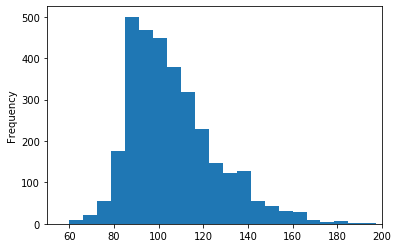

In [43]:
#Distribution of Runtime
runtime_df['Runtime_Minutes'].plot.hist(bins=40)
plt.xlim(50, 200)

**Create Categorical Var Based on Runtime Bins**

In [44]:
#Half of movies are between 1:32 and 1:57 in length
runtime_df[['Runtime_Minutes']].describe()

,Runtime_Minutes
count,3188.000000
mean,106.287641
std,20.006696
min,60.000000
25%,92.000000
50%,102.500000
75%,117.000000
max,310.000000


**Bins with Equal Number of Occurrences**

In [46]:
bin_names = ['Short', 'Short-Medium', 'Medium', 'Medium-Long', 'Long', 'Very Long']
# bin_numbers = [0, 79, 99, 129, 149, 999999999]
runtime_df['Runtime_Bins'] = pd.qcut(runtime_df['Runtime_Minutes'], q = 6, labels = bin_names)
runtime_df['Runtime_Bins'].value_counts()

Medium-Long     561
Short           560
Short-Medium    535
Medium          514
Long            510
Very Long       508
Name: Runtime_Bins, dtype: int64

In [48]:
equal_bins = runtime_df.groupby('Runtime_Bins').median()
equal_bins = equal_bins[['Lifetime_Gross']]
equal_bins

,Lifetime_Gross
Runtime_Bins,
Short,66423.0
Short-Medium,129124.0
Medium,965542.0
Medium-Long,2146999.0
Long,8379841.5
Very Long,2184309.5


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

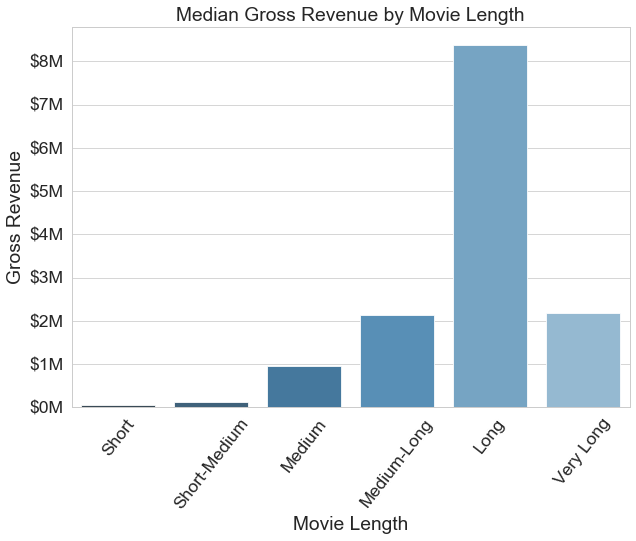

In [49]:
#Set style, font size, figure size
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=2) 
fig, ax = plt.subplots(figsize=(10, 7))

#Format y axis for millions of dollars
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '$' + '{:,.0f}'.format(x/1000000) + 'M'))

#Create graph and format labels
g = sns.barplot(x= equal_bins.index, y=equal_bins['Lifetime_Gross'], data = equal_bins, palette='Blues_d').set(xlabel = 'Movie Length', ylabel = 'Gross Revenue', title = 'Median Gross Revenue by Movie Length')
plt.xticks(rotation=52)

**Custom Sized Bins - Subjective Categorization**

In [52]:
bin_names = ['Short', 'Medium', 'Medium-Long', 'Long', 'Very Long']
bin_numbers = [0, 79, 99, 129, 149, 999999999]
runtime_df['Runtime_Bins'] = pd.cut(runtime_df['Runtime_Minutes'], bins = bin_numbers, labels = bin_names)
runtime_df['Runtime_Bins'].value_counts()

Medium-Long    1402
Medium         1270
Long            300
Very Long       116
Short           100
Name: Runtime_Bins, dtype: int64

In [55]:
subj_bins = runtime_df.groupby('Runtime_Bins').median()
subj_bins = subj_bins[['Lifetime_Gross']]
subj_bins

,Lifetime_Gross
Runtime_Bins,
Short,23611.5
Medium,148617.0
Medium-Long,2977735.0
Long,2003440.5
Very Long,2089141.0


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

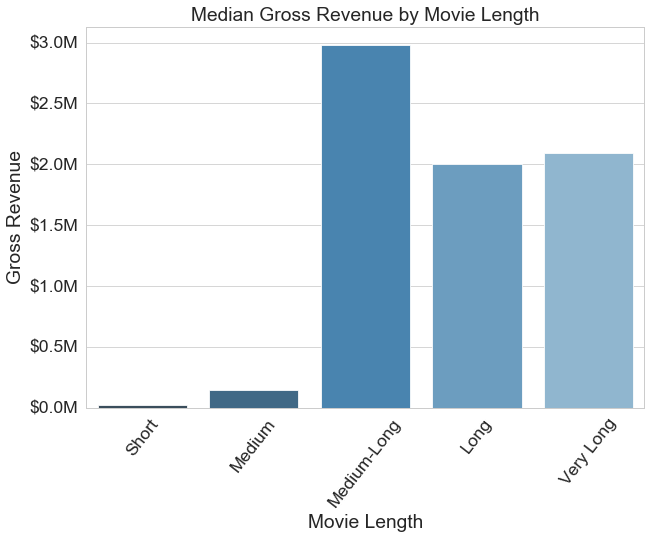

In [57]:
#Set style, font size, figure size
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=2) 
fig, ax = plt.subplots(figsize=(10, 7))

#Format y axis for millions of dollars
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '$' + '{:,.1f}'.format(x/1000000) + 'M'))

#Create graph and format labels
g = sns.barplot(x= subj_bins.index, y=subj_bins['Lifetime_Gross'], data = subj_bins, palette='Blues_d').set(xlabel = 'Movie Length', ylabel = 'Gross Revenue', title = 'Median Gross Revenue by Movie Length')
plt.xticks(rotation=52)